# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
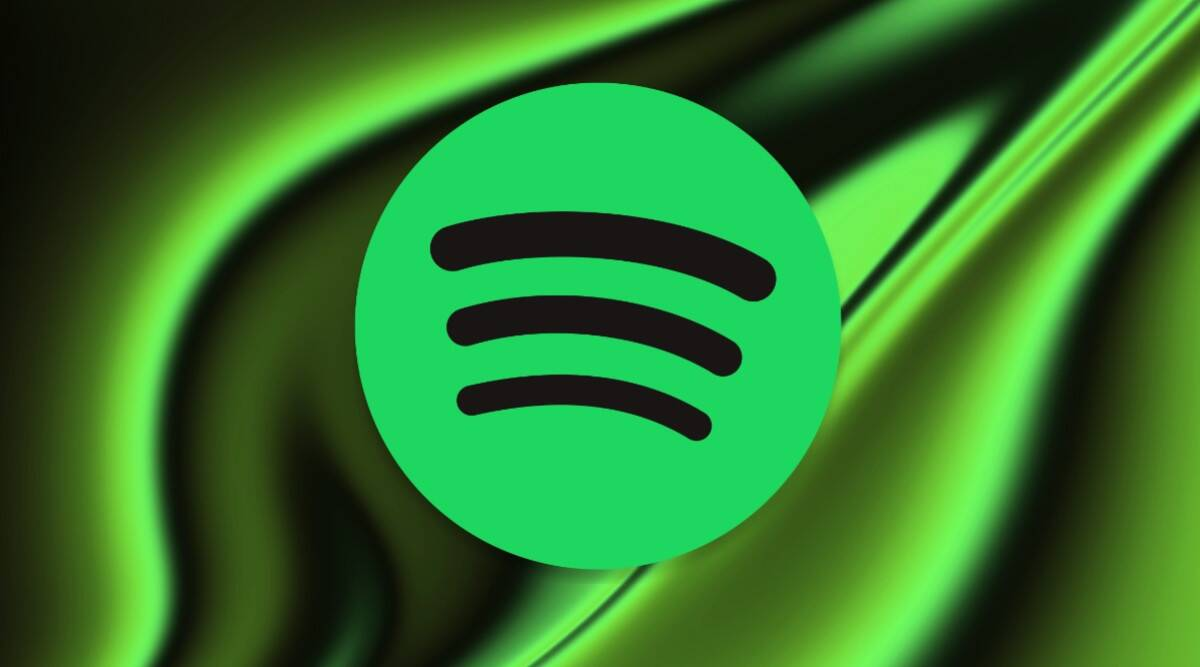
</div>

# Import Libraries

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from pprint import pprint

In [275]:
%pwd

'/content'

# Load Spotify Dataset (CSV file)

In [276]:
spotify_df = pd.read_csv("/content/Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [277]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [278]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [279]:
spotify_df.groupby('artist_name')\
  .size()\
  .sort_values(ascending=False)\
  .to_frame(name='track_count').reset_index()

,artist_name,track_count
0,Mohammadreza Shajarian,554
1,Hossein Alizadeh,545
2,Reza Sadeghi,507
3,Dariush,465
4,Alireza Eftekhari,439
...,...,...
64,Nasser Abdollahi,22
65,Mohammad Golriz,17
66,Ebrahim Monsefi,16
67,Farman Fathalian,10


## Q: Get the average duration of songs by each of the artists in minutes

In [280]:
(spotify_df.groupby('artist_name')['duration_ms'].mean() / (1000 * 60))\
  .sort_values(ascending=False)\
  .to_frame(name='avg_duration').reset_index()

,artist_name,avg_duration
0,Kayhan Kalhor,7.627583
1,Hatam Asgari,7.155098
2,Iraj Bastami,7.060861
3,Shahram Nazeri,6.852404
4,Hesameddin Seraj,6.720927
...,...,...
64,Macan Band,3.222035
65,Mazyar Fallahi,3.198591
66,Sasy,3.131618
67,Soheil Nafissi,3.063580


## Q: list of artist's unique names

In [281]:
spotify_df['artist_name'].unique()

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

## Q: Plot average duration of tracks by year

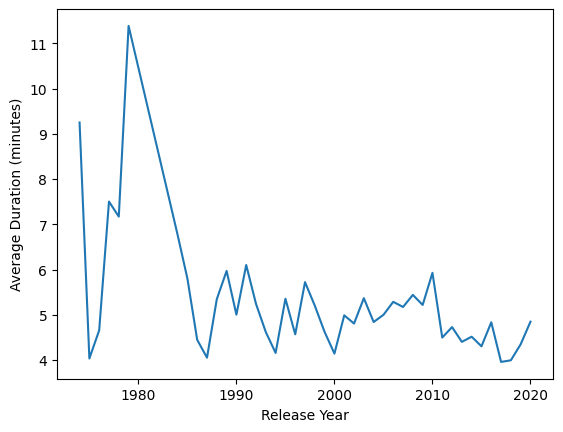

In [282]:
avg_duration = spotify_df.groupby('album_release_year')['duration_ms'].mean() / (1000 * 60)
# release year is '0' for some of the tracks, omit them
avg_duration = avg_duration.loc[1:]

plt.plot(avg_duration.index, avg_duration.values)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

## Q: Plot average loudness of tracks by year

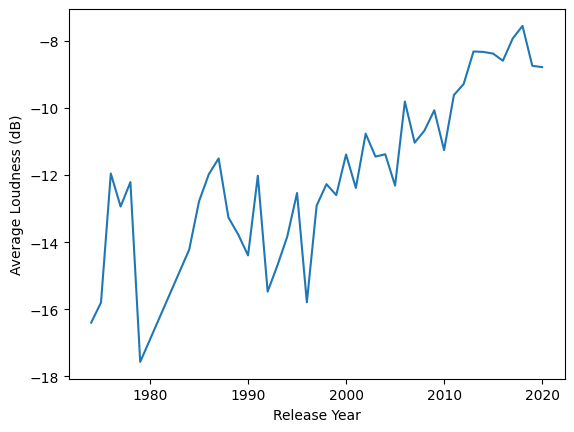

In [283]:
avg_loudness = spotify_df.groupby('album_release_year')['loudness'].mean()
# loudness is '0' for some of the tracks, omit them
avg_loudness = avg_loudness.loc[1:]

plt.plot(avg_loudness.index, avg_loudness.values)
plt.xlabel('Release Year')
plt.ylabel('Average Loudness (dB)')
plt.show()

## Q: Music attributes of songs over the years


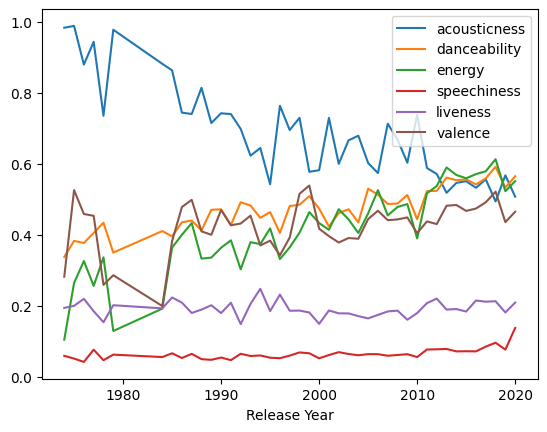

In [284]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

for col in target_cols:
  avg_attribute = spotify_df.groupby('album_release_year')[col].mean()
  # omit the tracks with '0' as release year
  avg_attribute = avg_attribute.loc[1:]

  plt.plot(avg_attribute.index, avg_attribute.values, label=col)

plt.xlabel('Release Year')
plt.legend()
plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

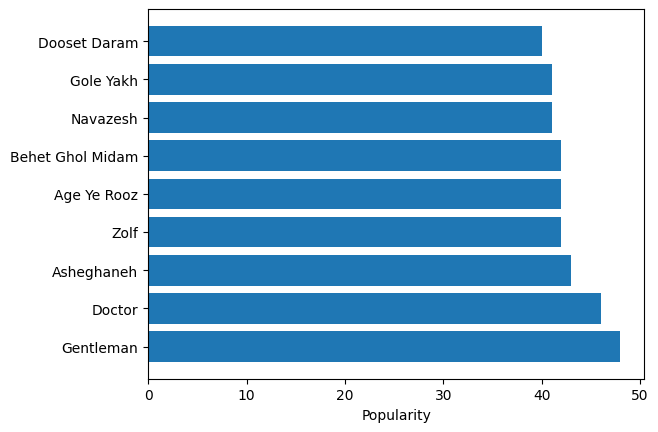

In [285]:
top_tracks = spotify_df.sort_values('popularity', ascending=False).head(10)

plt.barh(top_tracks['track_name'], top_tracks['popularity'])
plt.xlabel('Popularity')
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

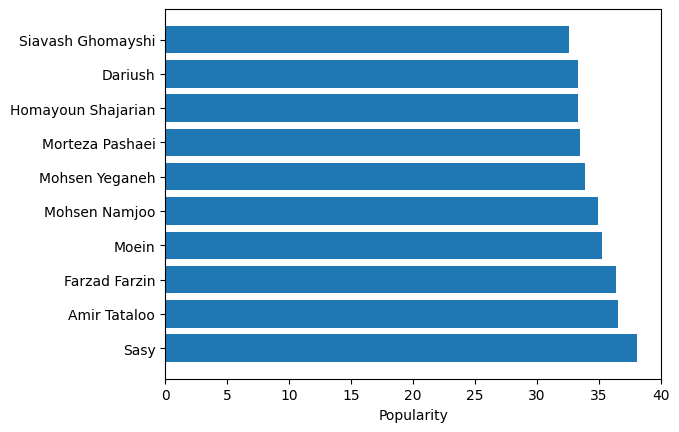

In [286]:
top_artists = spotify_df.groupby('artist_name')['popularity'].mean()\
                  .sort_values(ascending=False).head(10)

plt.barh(top_artists.index, top_artists.values)
plt.xlabel('Popularity')
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

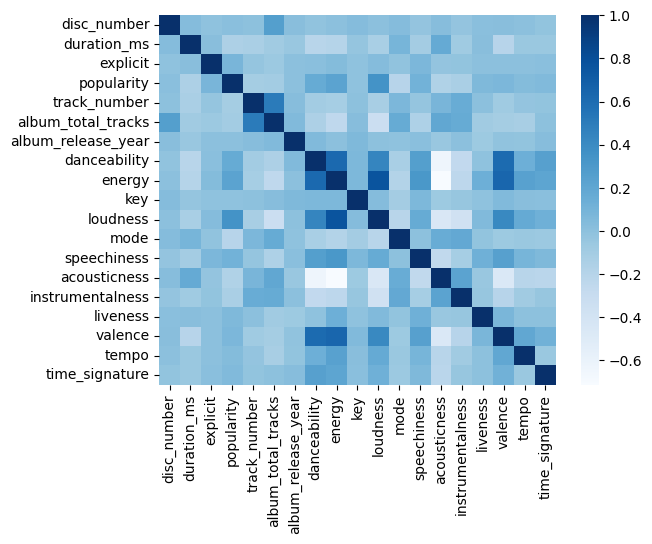

In [287]:
corr_matrix = spotify_df.corr(numeric_only=True)

dataplot = sns.heatmap(corr_matrix, cmap=plt.cm.Blues)
plt.show()

In [288]:
duration_corr = corr_matrix.loc['duration_ms'].abs().sort_values(ascending=False)
print(f"Feature most correlated with duration: {duration_corr.index[1]}")

popularity_corr = corr_matrix.loc['popularity'].abs().sort_values(ascending=False)
print(f"Feature most correlated with popularity: {popularity_corr.index[1]}")

Feature most correlated with duration: danceability
Feature most correlated with popularity: loudness


## Q: Plot box-plot for each feature
Compare box-plot values of `energy` and `liveness`

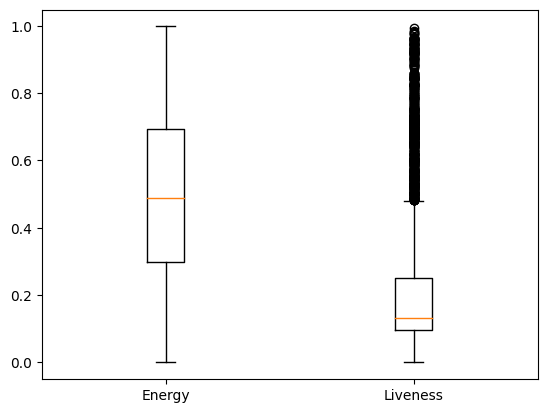

In [289]:
plt.boxplot([spotify_df['energy'], spotify_df['liveness']])
plt.xticks([1, 2], ['Energy', 'Liveness'])

plt.show()

## Q: Missing values
How many `nan` values are there in each column?

In [290]:
print(f"Number of total records: {len(spotify_df.index)}\n")

spotify_df.isna().sum()\
  .to_frame(name='#NaN').reset_index()

Number of total records: 10632



,index,#NaN
0,track_id,0
1,disc_number,0
2,duration_ms,0
3,explicit,0
4,track_name,0
5,track_name_farsi,10020
6,artist_name,0
7,artist_name_farsi,0
8,popularity,9701
9,track_number,0


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [291]:
# Fill the rest of the (nominal) values
nominal_features = ['track_name_farsi', 'album_href', 'key_name', 'mode_name', 'key_mode']
for nf in nominal_features:
  spotify_df[nf] = spotify_df[nf].fillna(value='None')

**NOTE:** According to the table above (showing the number of NaN values corresponding to each feature), we shall fill the missing values of the two numeric features `album_total_tracks` and `popularity`.\
By plotting the boxplots for these two features, we can gain a better understanding of their value distribution, which helps us choose a suitable imputation method.
As can be seen below, the `popularity` feature has a distribution close to the normal distribution, while it's not the case for the `album_total_tracks` feature. Hence, using the median value may be a better option for the latter one.\
Also, the two features have a lot of missing values (approximately only 1 out of 12 records has these features indicated), and as the `popularity` feature plays an important role in our task, we make use of a KNN imputer to fill the missing values of it.

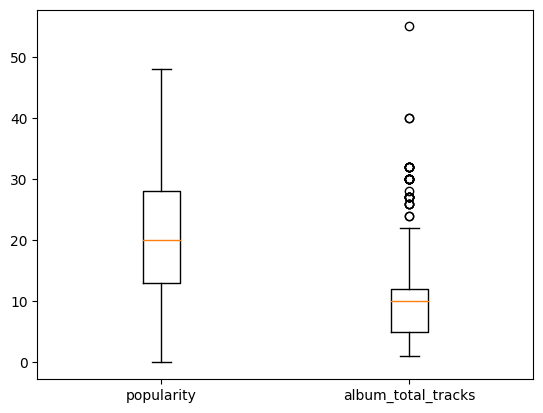

In [292]:
plt.boxplot([spotify_df['popularity'].dropna(), spotify_df['album_total_tracks'].dropna()])
plt.xticks([1, 2], ['popularity', 'album_total_tracks'])

plt.show()

In [293]:
# Fill the 'album_total_tracks' with its median value, as the distribution is more skewed
spotify_df['album_total_tracks'] = spotify_df['album_total_tracks'].fillna(spotify_df['album_total_tracks'].median())

# 'popularity' has a lot of NaN values, therefore use KNN imputer
imputer = KNNImputer(n_neighbors=15)
spotify_df['popularity'] = imputer.fit_transform(spotify_df[['popularity']])

spotify_df

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,20.113856,1,...,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,20.113856,2,...,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,20.113856,3,...,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,20.113856,4,...,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,None,Salar Aghili,سالار عقیلی,20.113856,5,...,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,C minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4pEbf7VQrO4StzbqdFOnr5,1,397505,False,Zarbie Bayat Tork (Che Danestam),None,Shahram Nazeri,شهرام ناظري,20.113856,19,...,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,E minor
10628,6umKGf6TO7aRXvJWkP6WSy,1,3522173,False,Conserte Asatid,None,Shahram Nazeri,شهرام ناظري,20.113856,1,...,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,F minor
10629,5KiMQApCqUVNObTO004MWI,1,3402706,False,Soofi Nameh,None,Shahram Nazeri,شهرام ناظري,20.113856,1,...,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,G# major
10630,4w1VKm2kjmA2Xz4YSMBfIn,1,3342733,False,Saghi Nameh,None,Shahram Nazeri,شهرام ناظري,20.113856,1,...,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,G# major


# Determine your desired features here

**NOTE:** Here, it's just a list of all the independent features that may come in handy in future predictions- it's not the final selection. Features like `track_id` and `track_name` are ommited, as they are too specific to be used in any of the prediction tasks.

In [294]:
music_feature_cols = [
    'disc_number',
    'duration_ms',
    'explicit',
    'artist_name',
    'track_number',
    'album_total_tracks',
    'album_release_year',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'popularity'
]

nominal_features = [
    'explicit',
    'artist_name'
]

In [295]:
tracks_feature_df = spotify_df[music_feature_cols].dropna()
tracks_feature_df

,disc_number,duration_ms,explicit,artist_name,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,1,446880,False,Salar Aghili,1,10.0,2020,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,20.113856
1,1,851920,False,Salar Aghili,2,10.0,2020,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,20.113856
2,1,293160,False,Salar Aghili,3,10.0,2020,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,20.113856
3,1,648720,False,Salar Aghili,4,10.0,2020,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,20.113856
4,1,273480,False,Salar Aghili,5,10.0,2020,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1,397505,False,Shahram Nazeri,19,10.0,1985,0.356,0.499,4,-10.805,0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,20.113856
10628,1,3522173,False,Shahram Nazeri,1,10.0,2008,0.318,0.163,5,-17.538,0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,20.113856
10629,1,3402706,False,Shahram Nazeri,1,10.0,2008,0.213,0.218,8,-15.865,1,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,20.113856
10630,1,3342733,False,Shahram Nazeri,1,10.0,2008,0.242,0.304,8,-13.286,1,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,20.113856


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models.

In [296]:
# Encode the nominal variables
le = preprocessing.LabelEncoder()

for col in nominal_features:
  le.fit(tracks_feature_df[col])
  tracks_feature_df[col] = le.transform(tracks_feature_df[col])


# Normalize the feature (except for 'popularity')
X = tracks_feature_df.drop('popularity', axis=1)

ss = StandardScaler()
normalized_X = ss.fit_transform(X)

scaled_tracks_df = pd.DataFrame(normalized_X, columns=music_feature_cols[:-2] + ['artist_name'])
scaled_tracks_df['popularity'] = tracks_feature_df['popularity']
tracks_feature_df = scaled_tracks_df


tracks_feature_df

,disc_number,duration_ms,explicit,artist_name,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,popularity
0,-0.179174,0.932542,-0.044487,1.143433,-1.009513,0.012815,0.164880,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-1.045944,20.113856
1,-0.179174,3.321961,-0.044487,1.143433,-0.788916,0.012815,0.164880,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,0.523636,20.113856
2,-0.179174,0.025714,-0.044487,1.143433,-0.568319,0.012815,0.164880,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,2.093217,20.113856
3,-0.179174,2.123240,-0.044487,1.143433,-0.347722,0.012815,0.164880,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,2.093217,20.113856
4,-0.179174,-0.090383,-0.044487,1.143433,-0.127125,0.012815,0.164880,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-4.185105,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,-0.179174,0.641268,-0.044487,1.292666,2.961232,0.012815,0.014256,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,2.093217,20.113856
10628,-0.179174,19.074364,-0.044487,1.292666,-1.009513,0.012815,0.113238,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.045944,20.113856
10629,-0.179174,18.369602,-0.044487,1.292666,-1.009513,0.012815,0.113238,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,0.523636,20.113856
10630,-0.179174,18.015808,-0.044487,1.292666,-1.009513,0.012815,0.113238,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.045944,20.113856


**NOTE:** As we're about to predict the popularity using regression, it's important to know the correlation of track's `popularity` with all the other features.\
Now that all the features are preprocessed and converted to numeric features, we observe their correlation with `popularity` once again.

In [297]:
corr_matrix = tracks_feature_df.corr(numeric_only=True)
popularity_corr = corr_matrix.loc['popularity'].abs().sort_values(ascending=False)
popularity_corr[1:]

loudness              0.095665
album_total_tracks    0.094973
energy                0.063384
mode                  0.053855
danceability          0.051573
acousticness          0.049657
artist_name           0.042548
explicit              0.041557
instrumentalness      0.034022
speechiness           0.033236
duration_ms           0.032209
track_number          0.027179
valence               0.021648
liveness              0.019973
artist_name           0.014544
tempo                 0.011760
album_release_year    0.004860
disc_number           0.001789
key                   0.001773
Name: popularity, dtype: float64

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


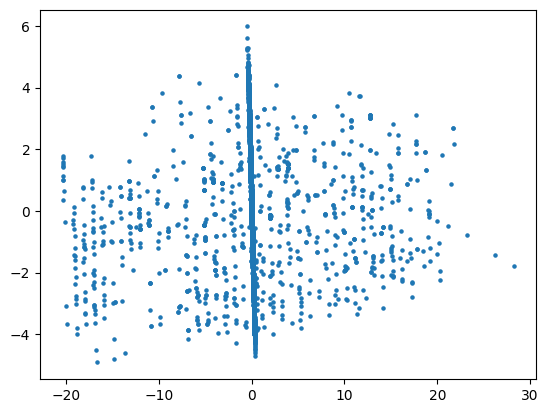

In [298]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


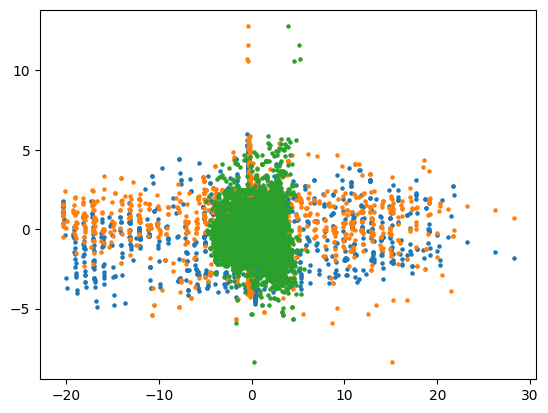

In [299]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [300]:
# Set random seed to make results reproducible
RANDOM_SEED = 42

**NOTE:** Here is the final list of features used in the regression task. The initial selection of these features was done using the most correlated features to `popularity`, computed above. But the list was enhanced afterwards using some trial and error.\
As Linear Regression is just a simple method, the number of final features is limited to a few.

In [301]:
df = tracks_feature_df
regression_features = [
    'loudness',
    'energy',
    'danceability',
    'artist_name',
    'liveness'
]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [302]:
regressor = LinearRegression(
    # pass parameters here
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.105916355058408
[ 0.39891565 -0.17734212  0.09566839  0.14255611  0.0265437   0.02121035]


## Evaluate Regression Algorithm

In [303]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.022809
1,20.113856,20.535438
2,20.113856,20.535254
3,20.113856,20.046600
4,20.113856,19.934449
...,...,...
3185,20.113856,20.299978
3186,12.000000,20.293492
3187,20.113856,19.545223
3188,20.113856,20.121152


In [304]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9622193514407891
Mean Squared Error: 8.796173216011066
Root Mean Squared Error: 2.9658343203913238


# Classification

## Prepare Labels

In [305]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh',
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani',
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami',
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [306]:
tracks_feature_df['is_sonnati'] = spotify_df['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)

In [307]:
tracks_feature_df.describe()

,disc_number,duration_ms,explicit,artist_name,track_number,album_total_tracks,album_release_year,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,popularity,is_sonnati
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,...,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000,10632.000000
mean,-2.031650e-16,-1.336612e-17,-5.346446e-18,1.176218e-16,0.000000,-4.130130e-16,2.566294e-16,-2.994010e-16,-5.881091e-17,2.004917e-17,...,-8.019670e-18,-8.019670e-18,-3.983103e-16,7.485025e-17,-7.485025e-17,-1.924721e-16,3.421726e-16,-8.019670e-17,20.113856,0.358728
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,...,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,3.080703,0.479650
min,-1.791740e-01,-1.680127e+00,-4.448683e-02,-1.741741e+00,-1.009513,-4.495300e+00,-8.528307e+00,-2.964434e+00,-2.049304e+00,-1.432162e+00,...,-7.728879e-01,-9.826719e-01,-1.918195e+00,-4.481700e-01,-1.248615e+00,-1.884641e+00,-4.002013e+00,-5.754685e+00,0.000000,0.000000
25%,-1.791740e-01,-5.028027e-01,-4.448683e-02,-9.955755e-01,-0.788916,1.281464e-02,1.003269e-01,-8.058199e-01,-8.206920e-01,-8.819636e-01,...,-7.728879e-01,-4.747521e-01,-8.735159e-01,-4.481700e-01,-6.295786e-01,-8.106294e-01,-8.134842e-01,-1.045944e+00,20.113856,0.000000
50%,-1.791740e-01,-2.075528e-01,-4.448683e-02,1.485454e-01,-0.127125,1.281464e-02,1.218447e-01,-8.047930e-02,-3.064107e-02,-5.666550e-02,...,-7.728879e-01,-3.509379e-01,3.631892e-01,-4.478620e-01,-3.892012e-01,-1.235549e-01,2.329099e-02,5.236364e-01,20.113856,0.000000
75%,-1.791740e-01,2.653078e-01,-4.448683e-02,8.947111e-01,0.534665,1.281464e-02,1.476660e-01,8.189431e-01,8.131829e-01,1.043732e+00,...,1.293849e+00,-3.682961e-02,8.572419e-01,-3.957539e-01,3.668246e-01,7.632628e-01,6.252294e-01,5.236364e-01,20.113856,1.000000
max,7.585681e+00,2.176604e+01,2.247856e+01,1.640877e+00,5.828992,2.255339e+01,1.648803e-01,2.629393e+00,2.074783e+00,1.593931e+00,...,1.293849e+00,1.222887e+01,1.215981e+00,3.052098e+00,5.161450e+00,2.214799e+00,3.371699e+00,2.093217e+00,48.000000,1.000000


## Create Classification Dataset

**NOTE:** Here is a list of features that must be excluded before running the classification task.
*   `is_sonnati`: it's the label of the data.
*   `artist_name`: as `is_sonnati` feature is not independent of this feature, it must be excluded.
*   `popularity`: this feature is highly correlated with the `artist_name` feature, hence must be excluded.
* `album_total_tracks`, `explicit`, `track_number`, and `disc_number`: excluded based on the correlation with `is_sonnati` feature computed below + some trial and error.



In [315]:
corr_matrix = tracks_feature_df.corr(numeric_only=True)
popularity_corr = corr_matrix.loc['is_sonnati'].abs().sort_values(ascending=False)
popularity_corr[1:]

acousticness          0.526429
energy                0.521078
danceability          0.476864
loudness              0.371824
valence               0.365074
instrumentalness      0.324497
mode                  0.281554
duration_ms           0.223349
tempo                 0.190946
speechiness           0.189269
artist_name           0.188861
disc_number           0.090359
track_number          0.076226
album_release_year    0.072076
artist_name           0.066585
key                   0.066389
popularity            0.030535
liveness              0.029724
explicit              0.024439
album_total_tracks    0.008981
Name: is_sonnati, dtype: float64

In [357]:
excluded_features = [
    'is_sonnati',
    'artist_name',
    'popularity',
    'album_total_tracks',
    'explicit',
    'track_number',
    'disc_number'
]

In [358]:
x = tracks_feature_df.reset_index().drop(columns=excluded_features).values
y = tracks_feature_df['is_sonnati'].values

In [359]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 14)
y.shape=(10632,)


In [360]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`)


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [361]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset

    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)

    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )

    # train model
    classifier = make_pipeline(StandardScaler(), model)

    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])

    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)

    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [362]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.8310344827586207,
 'confusion': array([[1820,  275],
       [ 264,  831]]),
 'f1': 0.7551113130395275,
 'precision': 0.7513562386980108,
 'recall': 0.7589041095890411}


**NOTE:** Random Forest is an ensemble learning method and using this ensemble approach can often lead to better generalization and improved performance compared to individual classifiers like Decision Trees.\
Plus, as we have a limited amount of data (which itself contained a lot of NaN values that are imputed and hence are prone to be noisy), the Random Forest classifier's ability to handle overfitting can be an advantage.
Also, the performance was compared with other methods like DT, AdaBoost, and MLP and at the end, Random Forest gave off the best result among them.\
The number of estimators and `critorion` was chosen using some basic knowledge and trial and error.

In [369]:
#autograde
pprint(fit_and_eval(RandomForestClassifier(n_estimators=150, criterion="entropy", random_state=RANDOM_SEED), dataset))

{'acc': 0.8830721003134796,
 'confusion': array([[1902,  193],
       [ 180,  915]]),
 'f1': 0.8306854289605083,
 'precision': 0.825812274368231,
 'recall': 0.8356164383561644}
